# Learning Data Science — Predict Stock Price with Support Vector Regression (SVR)

### Importación de librerias y dependencias

In [6]:
import numpy as np
from sklearn.svm import SVR 
import matplotlib.pyplot as plt 
import pandas as pd 
%matplotlib inline

### Preparación de la data

In [10]:
#Usaremos la información de Toronto-Dominion Bank (TD.TO), correspondiente a la fecha del 01-01-2019 al 30-01-2019
df = pd.read_csv('./TD.TO.csv')
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,67.510002,68.430000,67.120003,68.250000,58.394657,3930300
1,2019-01-03,68.110001,68.110001,67.120003,67.300003,57.581833,5407700
2,2019-01-04,68.000000,68.150002,67.669998,67.980003,58.163643,5103400
3,2019-01-07,68.589996,68.589996,67.449997,67.690002,57.915527,5907000
4,2019-01-08,68.000000,68.190002,67.330002,67.820000,58.026737,7337200
5,2019-01-09,67.500000,68.410004,67.379997,68.139999,58.882240,5124400
6,2019-01-10,68.199997,68.870003,67.779999,68.800003,59.452572,3953000
7,2019-01-11,68.839996,68.860001,68.330002,68.860001,59.504410,3519700
8,2019-01-14,68.739998,69.050003,68.559998,68.650002,59.322937,3248300
9,2019-01-15,68.550003,69.540001,68.419998,69.330002,59.910561,2665500


In [11]:
# Obtenemos toda la data con la siguiente función: get_data()
def get_data(df):  
    data = df.copy()
    data['Date'] = data['Date'].str.split('-').str[2]
    data['Date'] = pd.to_numeric(data['Date'])
    return [ data['Date'].tolist(), data['Close'].tolist() ] # Convierte series a listas (tolist)
dates, prices = get_data(df)

### Funcion para  construir los modelos y comenzar a predecir


In [9]:
# Función para predecir
def predict_prices(dates, prices, x):
    dates = np.reshape(dates,(len(dates), 1)) # Convierte a dimensión 1 x n 
    x = np.reshape(x,(len(x), 1))
    
    svr_lin  = SVR(kernel='linear', C=1e3)
    svr_poly = SVR(kernel='poly', C=1e3, degree=2)
    svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
    
# Ajustar modelo de regresión
    svr_lin .fit(dates, prices)
    svr_poly.fit(dates, prices)
    svr_rbf.fit(dates, prices)
    
# Función para graficar 
    
    plt.scatter(dates, prices, c='k', label='Data')
    plt.plot(dates, svr_lin.predict(dates), c='g', label='Linear model')
    plt.plot(dates, svr_rbf.predict(dates), c='r', label='RBF model')    
    plt.plot(dates, svr_poly.predict(dates), c='b', label='Polynomial model')
    
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()
    
    return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)[0]

### Obtener la predicción y mostrar los modelos predictivos

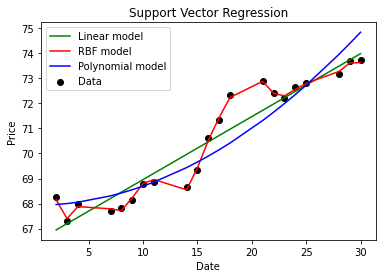

In [5]:
predicted_price = predict_prices(dates, prices, [31])
# (73.18055746816138, 74.23818331643184, 75.30920098568245)